# 한 눈에 보는 머신러닝

**감사의 글**

오렐리앙 제롱<font size='2'>Aurélien Géron</font>의 [Hands-On Machine Learning with Scikit-Learn and PyTorch (O'Reilly, 2025)](https://github.com/ageron/handson-mlp)에 사용된 코드를 참고한 강의노트입니다. 자료를 공개한 오렐리앙 제롱과 일부 그림 자료를 제공해 준 한빛아카데미에게 진심어린 감사를 전합니다.

## 환경설정

This project requires Python 3.10 or above:

In [1]:
import sys

assert sys.version_info >= (3, 10)

It also requires Scikit-Learn ≥ 1.6.1:

In [2]:
from packaging.version import Version
import sklearn

assert Version(sklearn.__version__) >= Version("1.6.1")

Let's define the default font sizes, to plot pretty figures:

In [3]:
import matplotlib.pyplot as plt

plt.rc('font', size=12)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=12)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

## 삶의 만족도 예측

### 데이터셋 다운로드

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

# Download and prepare the data
data_root = "https://github.com/codingalzi/code-workout-ml/raw/master/datasets/"

lifesat_full = pd.read_csv(data_root + "lifesat/lifesat_full.csv")

In [39]:
lifesat_full.set_index("Country", inplace=True)

In [40]:
lifesat_full.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40 entries, South Africa to Luxembourg
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   GDP per capita (USD)  40 non-null     float64
 1   Life satisfaction     40 non-null     float64
dtypes: float64(2)
memory usage: 960.0+ bytes


In [41]:
lifesat_full

,GDP per capita (USD),Life satisfaction
Country,,
South Africa,11466.189672,4.7
Colombia,13441.492952,6.3
Brazil,14063.982505,6.4
Mexico,17887.750736,6.5
Chile,23324.524751,6.5
Russia,26456.387938,5.8
Greece,27287.083401,5.4
Turkey,28384.987785,5.5
Latvia,29932.493910,5.9


In [42]:
gdppc_col = "GDP per capita (USD)"
lifesat_col = "Life satisfaction"

min_gdp = 23_500
max_gdp = 62_500

lifesat = lifesat_full[(lifesat_full[gdppc_col] >= min_gdp) &
                                   (lifesat_full[gdppc_col] <= max_gdp)]

In [43]:
lifesat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31 entries, Russia to United States
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   GDP per capita (USD)  31 non-null     float64
 1   Life satisfaction     31 non-null     float64
dtypes: float64(2)
memory usage: 744.0+ bytes


제외된 9개 국가

In [44]:
set(lifesat_full.index) - set(lifesat.index)

{'Brazil',
 'Chile',
 'Colombia',
 'Ireland',
 'Luxembourg',
 'Mexico',
 'Norway',
 'South Africa',
 'Switzerland'}

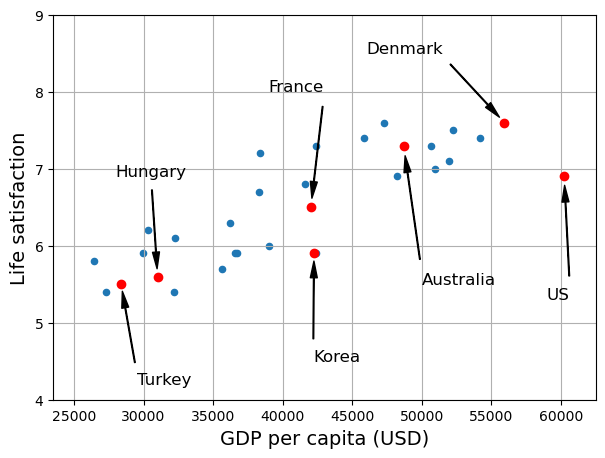

In [51]:
lifesat.plot(kind='scatter', figsize=(7, 5), grid=True,
                   x=gdppc_col, y=lifesat_col)

min_life_sat = 4
max_life_sat = 9

position_text = {
    "Turkey": (29_500, 4.2),
    "Hungary": (28_000, 6.9),
    "France": (39_000, 8.0),
    "South Korea": (42_200, 4.5),
    # "New Zealand": (28_000, 8.2),
    "Australia": (50_000, 5.5),
    "United States": (59_000, 5.3),
    "Denmark": (46_000, 8.5)
}

for country, pos_text in position_text.items():
    pos_data_x = lifesat[gdppc_col].loc[country]
    pos_data_y = lifesat[lifesat_col].loc[country]

    # 미국과 한국 단축명 활용
    if country == "United States":
        country = "US"
    elif  country == "South Korea":
        country = "Korea"
        
    plt.annotate(country, xy=(pos_data_x, pos_data_y),
                 xytext=pos_text, fontsize=12,
                 arrowprops=dict(facecolor='black', width=0.5,
                                 shrink=0.08, headwidth=5))
    plt.plot(pos_data_x, pos_data_y, "ro")

plt.axis([min_gdp, max_gdp, min_life_sat, max_life_sat])

plt.show()

선택된 7개 국가 데이터

In [52]:
highlighted_countries = lifesat.loc[list(position_text.keys())]
highlighted_countries[[gdppc_col, lifesat_col]].sort_values(by=gdppc_col)

,GDP per capita (USD),Life satisfaction
Country,,
Turkey,28384.987785,5.5
Hungary,31007.768407,5.6
France,42025.617373,6.5
South Korea,42251.445057,5.9
Australia,48697.837028,7.3
Denmark,55938.212809,7.6
United States,60235.728492,6.9


적절하지 않은 세 개의 선형 회귀 모델

- 세 직선의 기울기와 절편은 사람이 수동으로 적절하지 않은 선형 회귀 모델을 시각화하기 위해 임의로 선택됨.

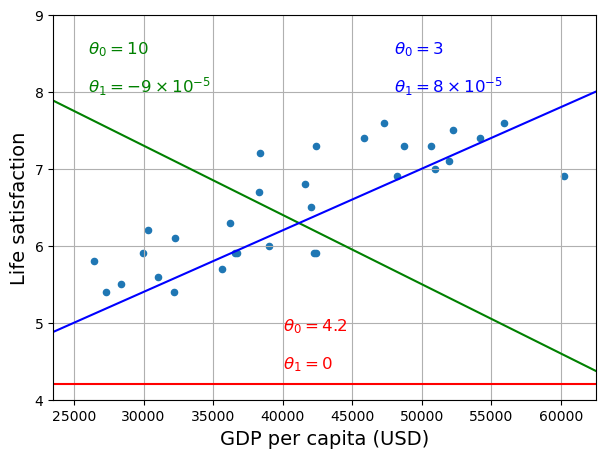

In [54]:
lifesat.plot(kind='scatter', figsize=(7, 5), grid=True,
                   x=gdppc_col, y=lifesat_col)

X = np.linspace(min_gdp, max_gdp, 1000)

w1, w2 = 4.2, 0
plt.plot(X, w1 + w2 * 1e-5 * X, "r")
plt.text(40_000, 4.9, fr"$\theta_0 = {w1}$", color="r")
plt.text(40_000, 4.4, fr"$\theta_1 = {w2}$", color="r")

w1, w2 = 10, -9
plt.plot(X, w1 + w2 * 1e-5 * X, "g")
plt.text(26_000, 8.5, fr"$\theta_0 = {w1}$", color="g")
plt.text(26_000, 8.0, fr"$\theta_1 = {w2} \times 10^{{-5}}$", color="g")

w1, w2 = 3, 8
plt.plot(X, w1 + w2 * 1e-5 * X, "b")
plt.text(48_000, 8.5, fr"$\theta_0 = {w1}$", color="b")
plt.text(48_000, 8.0, fr"$\theta_1 = {w2} \times 10^{{-5}}$", color="b")

plt.axis([min_gdp, max_gdp, min_life_sat, max_life_sat])

plt.show()

### 선형회귀 예측

**훈련셋**

In [56]:
X = lifesat[["GDP per capita (USD)"]].values

**타깃셋**

In [57]:
y = lifesat[["Life satisfaction"]].values

**선형 회귀 모델 지정**

절편 $\theta_0$와 기울기 $\theta_1$이 무작위로 선택되어 초기화된
선형 회귀 모델을 지정하여 학습을 준비한다.

In [75]:
# Select a linear model
oecd_model = LinearRegression()

**선형 회귀 모델 학습**

훈련셋과 타깃셋을 이용하여 지정된 선형 회귀 모델을 학습시킨다.
학습이 완료된 모델은 최적의 절편 $\theta_0$와 기울기 $\theta_1$을 모델 내부에 저장한다.

In [76]:
# Train the model
oecd_model.fit(X, y)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


**모델 예측**

학습이 완료된 모델의 `predict()` 메서드를 이용하여 예측값을 생성한다.
예를 들어, 1인당 GDP가 33,422.8 달러인 국가의 국민들의 삶의 만족도는
6.0 정도로 예측된다.
참고로, 33,422.8 달러는 2020년 기준 푸에르토리코의 1인당 GDP다.

아래 코드에서 `X_new` 변수가 `predict()` 메서드의 인자인 2차원 리스트를 가리킨다.

In [77]:
# Make a prediction for Puerto Rico 
X_new = [[33_442.8]]  # Puerto Rico' GDP per capita in 2020
print(oecd_model.predict(X_new)) # outputs [[6.01610329]]

[[6.01498592]]


학습된 모델의 `predict()` 메서드의 인자는 2차원 리스트 또는 2차원 어레이 이어야 한다.
반환값 또한 2차원 어레이임에 주의한다.

먼저, 내부의 리스트는 예측에 필요한 모든 데이터를 담아야 한다.
`oecd_model`이 한 국가의 삶의 만족도를 예측하기 위해 필요한 정보는 해당 국가의
1인당 GDP 데이터 하나 뿐이다.
따라서 푸에르토리코의 삶의 만족도 예측에 필요한 리스트는 길이가 1인 리스트 `[6.01498592]`이다.

다음, 1차원 리스트를 감싸는 외부 리스트는 하나의 국가가 아닌 여러 개 국가의
삶의 만족도를 동시에 예측하도록 하기 위함이다.
예를 들어, 한국과 일본의 삶의 만족도를 동시에 다음과 같이 예측할 수 있다.

In [78]:
korea_gdp = lifesat_full.loc["South Korea", gdppc_col]
japan_gdp = lifesat_full.loc["Japan", gdppc_col]

print("한국 1인당 GDP:", korea_gdp)
print("일본 1인당 GDP:", japan_gdp)

oecd_model.predict([[korea_gdp], [japan_gdp]])

한국 1인당 GDP: 42251.4450571656
일본 1인당 GDP: 42390.4450571656


array([[6.58802774],
       [6.59707032]])

반환값이 2차원 어레이 이유는 머신러닝 모델이
여러 종류의 예측값을 동시에 예측하도록 학습될 수 있기 때문인데,
여기서는 '삶의 만족도' 한 종류의 값만 예측하도록 학습되었기에 길이가 1인 리스트로 구성된
2차원 어레이가 반환된다.

## 데이터 전처리

This is the code I used to generate the `lifesat.csv` dataset.

### Load and prepare Life satisfaction data

To create `lifesat.csv`, I downloaded the Better Life Index (BLI) data from [OECD's website](http://stats.oecd.org/index.aspx?DataSetCode=BLI) (to get the Life Satisfaction for each country), and World Bank GDP per capita data from [OurWorldInData.org](https://ourworldindata.org/grapher/gdp-per-capita-worldbank). The BLI data is in `datasets/lifesat/oecd_bli.csv` (data from 2020), and the GDP per capita data is in `datasets/lifesat/gdp_per_capita.csv` (data up to 2020).

In [9]:
from pathlib import Path
import urllib.request

datapath = Path() / "datasets" / "lifesat"
datapath.mkdir(parents=True, exist_ok=True)

data_root = "https://github.com/codingalzi/code-workout-ml/blob/master/datasets/"
for filename in ("oecd_bli.csv", "gdp_per_capita.csv"):
    if not (datapath / filename).is_file():
        print("Downloading", filename)
        url = data_root + "lifesat/" + filename
        urllib.request.urlretrieve(url, datapath / filename)

In [12]:
oecd_bli = pd.read_csv(datapath / "oecd_bli.csv")
gdp_per_capita = pd.read_csv(datapath / "gdp_per_capita.csv")

In [13]:
oecd_bli.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2369 entries, 0 to 2368
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   LOCATION               2369 non-null   object 
 1   Country                2369 non-null   object 
 2   INDICATOR              2369 non-null   object 
 3   Indicator              2369 non-null   object 
 4   MEASURE                2369 non-null   object 
 5   Measure                2369 non-null   object 
 6   INEQUALITY             2369 non-null   object 
 7   Inequality             2369 non-null   object 
 8   Unit Code              2369 non-null   object 
 9   Unit                   2369 non-null   object 
 10  PowerCode Code         2369 non-null   int64  
 11  PowerCode              2369 non-null   object 
 12  Reference Period Code  0 non-null      float64
 13  Reference Period       0 non-null      float64
 14  Value                  2369 non-null   float64
 15  Flag

In [14]:
oecd_bli

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,5.40,NaN,NaN
1,AUT,Austria,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.50,NaN,NaN
2,BEL,Belgium,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.70,NaN,NaN
3,CAN,Canada,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,6.00,NaN,NaN
4,CZE,Czech Republic,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.10,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2364,LTU,Lithuania,WL_EWLH,Employees working very long hours,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,0.54,NaN,NaN
2365,COL,Colombia,WL_EWLH,Employees working very long hours,L,Value,MN,Men,PC,Percentage,0,Units,NaN,NaN,32.09,NaN,NaN
2366,LTU,Lithuania,WL_EWLH,Employees working very long hours,L,Value,MN,Men,PC,Percentage,0,Units,NaN,NaN,0.67,NaN,NaN
2367,COL,Colombia,WL_EWLH,Employees working very long hours,L,Value,WMN,Women,PC,Percentage,0,Units,NaN,NaN,19.37,NaN,NaN


In [15]:
gdp_per_capita.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7110 entries, 0 to 7109
Data columns (total 4 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Entity                                               7110 non-null   object 
 1   Code                                                 5730 non-null   object 
 2   Year                                                 7110 non-null   int64  
 3   GDP per capita, PPP (constant 2017 international $)  7110 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 222.3+ KB


In [16]:
gdp_per_capita

,Entity,Code,Year,"GDP per capita, PPP (constant 2017 international $)"
0,Afghanistan,AFG,2002,1189.784668
1,Afghanistan,AFG,2003,1235.810063
2,Afghanistan,AFG,2004,1200.278013
3,Afghanistan,AFG,2005,1286.793659
4,Afghanistan,AFG,2006,1315.789117
...,...,...,...,...
7105,Zimbabwe,ZWE,2016,3173.610829
7106,Zimbabwe,ZWE,2017,3274.611198
7107,Zimbabwe,ZWE,2018,3341.665418
7108,Zimbabwe,ZWE,2019,3027.656038


Preprocess the GDP per capita data to keep only the year 2020:

In [17]:
gdp_year = 2020
gdppc_col = "GDP per capita (USD)"
lifesat_col = "Life satisfaction"

gdp_per_capita = gdp_per_capita[gdp_per_capita["Year"] == gdp_year]
gdp_per_capita = gdp_per_capita.drop(["Code", "Year"], axis=1)
gdp_per_capita.columns = ["Country", gdppc_col]
gdp_per_capita.set_index("Country", inplace=True)

In [18]:
gdp_per_capita

,GDP per capita (USD)
Country,
Afghanistan,1978.961579
Africa Eastern and Southern,3387.594670
Africa Western and Central,4003.158913
Albania,13295.410885
Algeria,10681.679297
...,...
Vanuatu,2762.791388
Vietnam,8200.331867
World,16194.040310


Preprocess the OECD BLI data to keep only the `Life satisfaction` column:

In [19]:
oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")

In [20]:
oecd_bli

Indicator,Air pollution,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Feeling safe walking alone at night,Homicide rate,Household net adjusted disposable income,Household net wealth,Housing expenditure,...,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Stakeholder engagement for developing regulations,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education
Country,,,,,,,,,,,,,,,,,,,,,
Australia,5.0,NaN,81.0,13.04,73.0,63.5,1.1,32759.0,427064.0,20.0,...,49126.0,95.0,NaN,85.0,2.7,502.0,14.35,91.0,93.0,21.0
Austria,16.0,0.9,85.0,6.66,72.0,80.6,0.5,33541.0,308325.0,21.0,...,50349.0,92.0,1.6,70.0,1.3,492.0,14.55,80.0,92.0,17.0
Belgium,15.0,1.9,77.0,4.75,63.0,70.1,1.0,30364.0,386006.0,21.0,...,49675.0,91.0,2.2,74.0,2.0,503.0,15.70,89.0,84.0,19.3
Brazil,10.0,6.7,49.0,7.13,61.0,35.6,26.7,NaN,NaN,NaN,...,NaN,90.0,NaN,NaN,2.2,395.0,NaN,79.0,73.0,16.2
Canada,7.0,0.2,91.0,3.69,73.0,82.2,1.3,30854.0,423849.0,22.0,...,47622.0,93.0,2.6,88.0,2.9,523.0,14.56,68.0,91.0,17.3
Chile,16.0,9.4,65.0,9.72,63.0,47.9,4.2,NaN,100967.0,18.0,...,25879.0,85.0,1.2,57.0,1.3,443.0,NaN,47.0,71.0,17.5
Colombia,10.0,23.9,54.0,26.56,67.0,44.4,24.5,NaN,NaN,17.0,...,NaN,89.0,1.2,NaN,1.4,410.0,NaN,53.0,75.0,14.1
Czech Republic,20.0,0.7,94.0,5.65,74.0,72.3,0.5,21453.0,NaN,24.0,...,25372.0,91.0,1.4,60.0,1.6,491.0,NaN,61.0,87.0,17.9
Denmark,9.0,0.5,81.0,2.34,74.0,83.5,0.6,29606.0,118637.0,23.0,...,51466.0,95.0,1.9,71.0,2.0,504.0,15.87,86.0,95.0,19.5


In [21]:
oecd_bli_list = oecd_bli.index.tolist()
gdp_per_capita_list = gdp_per_capita.index.tolist()

**두 데이터셋의 인덱스로 사용된 국가명 차이 확인**

In [22]:
set(oecd_bli_list) - set(gdp_per_capita_list)

{'Czech Republic', 'Korea', 'OECD - Total', 'Slovak Republic'}

- `'OECD - Total'`은 국가가 아님. 삭제 대상

In [23]:
oecd_bli.drop(index=['OECD - Total'], inplace=True)

- 체코, 대한민국, 슬로바키아 세 나라의 국가명이 두 데이터셋에서 다르게 불림. 이름 통일 필요.
    - `oecd_bli.csv` 파일: Czech Repulic, Korea, Slovak Republic
    - `gdp_per_capita.csv` 파일: Czechia, South Korea, Slovakia

In [24]:
names_to_change = {'Czech Republic': 'Czechia',
                   'Korea': 'South Korea',
                   'Slovak Republic': 'Slovakia'}

In [25]:
oecd_bli.rename(index=names_to_change, inplace=True)

잘 수정되었음을 확인할 수 있다.

In [26]:
oecd_bli_list = oecd_bli.index.tolist()
gdp_per_capita_list = gdp_per_capita.index.tolist()

In [27]:
set(oecd_bli_list) - set(gdp_per_capita_list)

set()

Now let's merge the life satisfaction data and the GDP per capita data, keeping only the GDP per capita and Life satisfaction columns:

In [28]:
full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                              left_index=True, right_index=True)
full_country_stats.sort_values(by=gdppc_col, inplace=True)
full_country_stats = full_country_stats[[gdppc_col, lifesat_col]]

In [29]:
full_country_stats

,GDP per capita (USD),Life satisfaction
Country,,
South Africa,11466.189672,4.7
Colombia,13441.492952,6.3
Brazil,14063.982505,6.4
Mexico,17887.750736,6.5
Chile,23324.524751,6.5
Russia,26456.387938,5.8
Greece,27287.083401,5.4
Turkey,28384.987785,5.5
Latvia,29932.493910,5.9


To illustrate the risk of overfitting, I use only part of the data in most figures (all countries with a GDP per capita between `min_gdp` and `max_gdp`). Later in the chapter I reveal the missing countries, and show that they don't follow the same linear trend at all.

In [30]:
min_gdp = 23_500
max_gdp = 62_500

country_stats = full_country_stats[(full_country_stats[gdppc_col] >= min_gdp) &
                                   (full_country_stats[gdppc_col] <= max_gdp)]
country_stats.head()

,GDP per capita (USD),Life satisfaction
Country,,
Russia,26456.387938,5.8
Greece,27287.083401,5.4
Turkey,28384.987785,5.5
Latvia,29932.493910,5.9
Slovakia,30330.042887,6.2


In [31]:
country_stats.to_csv(datapath / "lifesat.csv")
full_country_stats.to_csv(datapath / "lifesat_full.csv")

In [41]:
from sklearn import linear_model

X_sample = country_stats[[gdppc_col]].values
y_sample = country_stats[[lifesat_col]].values

lin1 = linear_model.LinearRegression()
lin1.fit(X_sample, y_sample)

t0, t1 = lin1.intercept_[0], lin1.coef_[0][0]
print(f"θ0={t0:.2f}, θ1={t1:.2e}")

θ0=3.84, θ1=6.51e-05


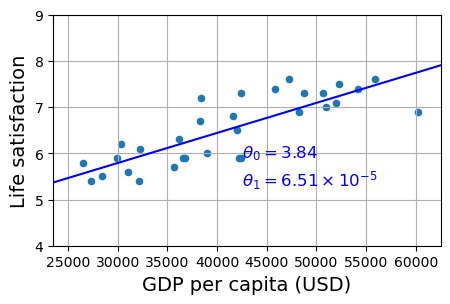

In [42]:
country_stats.plot(kind='scatter', figsize=(5, 3), grid=True,
                   x=gdppc_col, y=lifesat_col)

X = np.linspace(min_gdp, max_gdp, 1000)
plt.plot(X, t0 + t1 * X, "b")

plt.text(max_gdp - 20_000, min_life_sat + 1.9,
         fr"$\theta_0 = {t0:.2f}$", color="b")
plt.text(max_gdp - 20_000, min_life_sat + 1.3,
         fr"$\theta_1 = {t1 * 1e5:.2f} \times 10^{{-5}}$", color="b")

plt.axis([min_gdp, max_gdp, min_life_sat, max_life_sat])

plt.show()

In [43]:
puerto_rico_gdp_per_capita = gdp_per_capita[gdppc_col].loc["Puerto Rico"]
puerto_rico_gdp_per_capita

np.float64(33442.8315702748)

In [44]:
puerto_rico_predicted_life_satisfaction = lin1.predict(
    [[puerto_rico_gdp_per_capita]])[0, 0]
puerto_rico_predicted_life_satisfaction

np.float64(6.014987978508874)

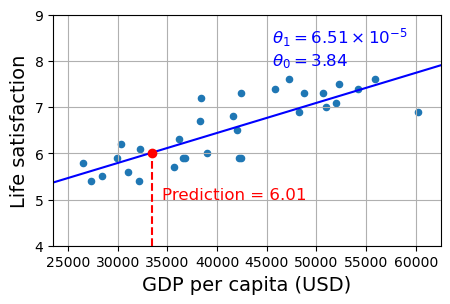

In [45]:
country_stats.plot(kind='scatter', figsize=(5, 3), grid=True,
                   x=gdppc_col, y=lifesat_col)

X = np.linspace(min_gdp, max_gdp, 1000)
plt.plot(X, t0 + t1 * X, "b")

plt.text(min_gdp + 22_000, max_life_sat - 1.1,
         fr"$\theta_0 = {t0:.2f}$", color="b")
plt.text(min_gdp + 22_000, max_life_sat - 0.6,
         fr"$\theta_1 = {t1 * 1e5:.2f} \times 10^{{-5}}$", color="b")

plt.plot([puerto_rico_gdp_per_capita, puerto_rico_gdp_per_capita],
         [min_life_sat, puerto_rico_predicted_life_satisfaction], "r--")
plt.text(puerto_rico_gdp_per_capita + 1000, 5.0,
         fr"Prediction = {puerto_rico_predicted_life_satisfaction:.2f}",
         color="r")
plt.plot(puerto_rico_gdp_per_capita, puerto_rico_predicted_life_satisfaction,
         "ro")

plt.axis([min_gdp, max_gdp, min_life_sat, max_life_sat])

plt.show()

In [46]:
missing_data = full_country_stats[(full_country_stats[gdppc_col] < min_gdp) |
                                  (full_country_stats[gdppc_col] > max_gdp)]
missing_data

,GDP per capita (USD),Life satisfaction
Country,,
South Africa,11466.189672,4.7
Colombia,13441.492952,6.3
Brazil,14063.982505,6.4
Mexico,17887.750736,6.5
Chile,23324.524751,6.5
Norway,63585.903514,7.6
Switzerland,68393.306004,7.5
Ireland,89688.956958,7.0
Luxembourg,110261.157353,6.9


In [47]:
position_text_missing_countries = {
    "South Africa": (20_000, 4.2),
    "Colombia": (6_000, 8.2),
    "Brazil": (18_000, 7.8),
    "Mexico": (24_000, 7.4),
    "Chile": (30_000, 7.0),
    "Norway": (51_000, 6.2),
    "Switzerland": (62_000, 5.7),
    "Ireland": (81_000, 5.2),
    "Luxembourg": (92_000, 4.7),
}

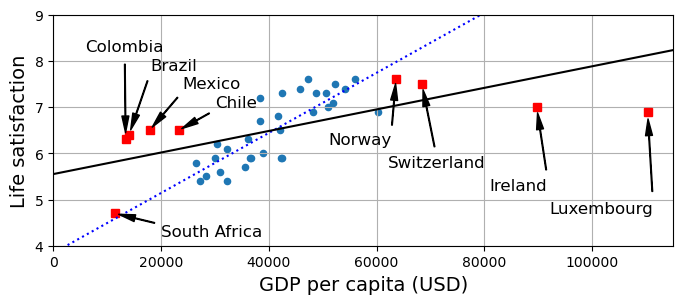

In [48]:
full_country_stats.plot(kind='scatter', figsize=(8, 3),
                        x=gdppc_col, y=lifesat_col, grid=True)

for country, pos_text in position_text_missing_countries.items():
    pos_data_x, pos_data_y = missing_data.loc[country]
    plt.annotate(country, xy=(pos_data_x, pos_data_y),
                 xytext=pos_text, fontsize=12,
                 arrowprops=dict(facecolor='black', width=0.5,
                                 shrink=0.08, headwidth=5))
    plt.plot(pos_data_x, pos_data_y, "rs")

X = np.linspace(0, 115_000, 1000)
plt.plot(X, t0 + t1 * X, "b:")

lin_reg_full = linear_model.LinearRegression()
Xfull = np.c_[full_country_stats[gdppc_col]]
yfull = np.c_[full_country_stats[lifesat_col]]
lin_reg_full.fit(Xfull, yfull)

t0full, t1full = lin_reg_full.intercept_[0], lin_reg_full.coef_[0][0]
X = np.linspace(0, 115_000, 1000)
plt.plot(X, t0full + t1full * X, "k")

plt.axis([0, 115_000, min_life_sat, max_life_sat])

plt.show()

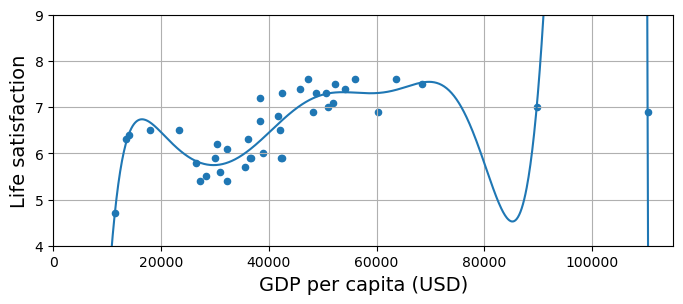

In [49]:
from sklearn import preprocessing
from sklearn import pipeline

full_country_stats.plot(kind='scatter', figsize=(8, 3),
                        x=gdppc_col, y=lifesat_col, grid=True)

poly = preprocessing.PolynomialFeatures(degree=10, include_bias=False)
scaler = preprocessing.StandardScaler()
lin_reg2 = linear_model.LinearRegression()

pipeline_reg = pipeline.Pipeline([
    ('poly', poly),
    ('scal', scaler),
    ('lin', lin_reg2)])
pipeline_reg.fit(Xfull, yfull)
curve = pipeline_reg.predict(X[:, np.newaxis])
plt.plot(X, curve)

plt.axis([0, 115_000, min_life_sat, max_life_sat])

plt.show()

In [50]:
w_countries = [c for c in full_country_stats.index if "W" in c.upper()]
full_country_stats.loc[w_countries][lifesat_col]

Country
New Zealand    7.3
Sweden         7.3
Norway         7.6
Switzerland    7.5
Name: Life satisfaction, dtype: float64

In [51]:
all_w_countries = [c for c in gdp_per_capita.index if "W" in c.upper()]
gdp_per_capita.loc[all_w_countries].sort_values(by=gdppc_col)

,GDP per capita (USD)
Country,
Malawi,1486.778248
Rwanda,2098.710362
Zimbabwe,2744.690758
Africa Western and Central,4003.158913
Papua New Guinea,4101.218882
Lower middle income,6722.809932
Eswatini,8392.717564
Low & middle income,10293.855325
Arab World,13753.707307


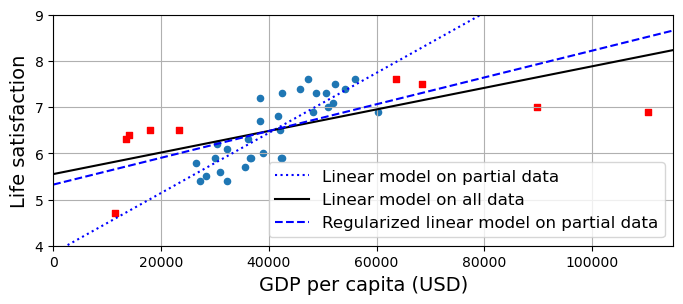

In [53]:
country_stats.plot(kind='scatter', x=gdppc_col, y=lifesat_col, figsize=(8, 3))
missing_data.plot(kind='scatter', x=gdppc_col, y=lifesat_col,
                  marker="s", color="r", grid=True, ax=plt.gca())

X = np.linspace(0, 115_000, 1000)
plt.plot(X, t0 + t1*X, "b:", label="Linear model on partial data")
plt.plot(X, t0full + t1full * X, "k-", label="Linear model on all data")

ridge = linear_model.Ridge(alpha=10**9.5)
X_sample = country_stats[[gdppc_col]]
y_sample = country_stats[[lifesat_col]]
ridge.fit(X_sample, y_sample)
t0ridge, t1ridge = ridge.intercept_[0], ridge.coef_[0]
plt.plot(X, t0ridge + t1ridge * X, "b--",
         label="Regularized linear model on partial data")
plt.legend(loc="lower right")

plt.axis([0, 115_000, min_life_sat, max_life_sat])

plt.show()